We first generate a random $d$-regular graph $G = (V, E)$, with $n$ vertices. Sometimes this code breaks. Just interupt it and restart it if it doesn't seem to be working. 

Number of stubs remaining: 000
Generated a 6-regular graph with 50 vertices
Number of edges: 150


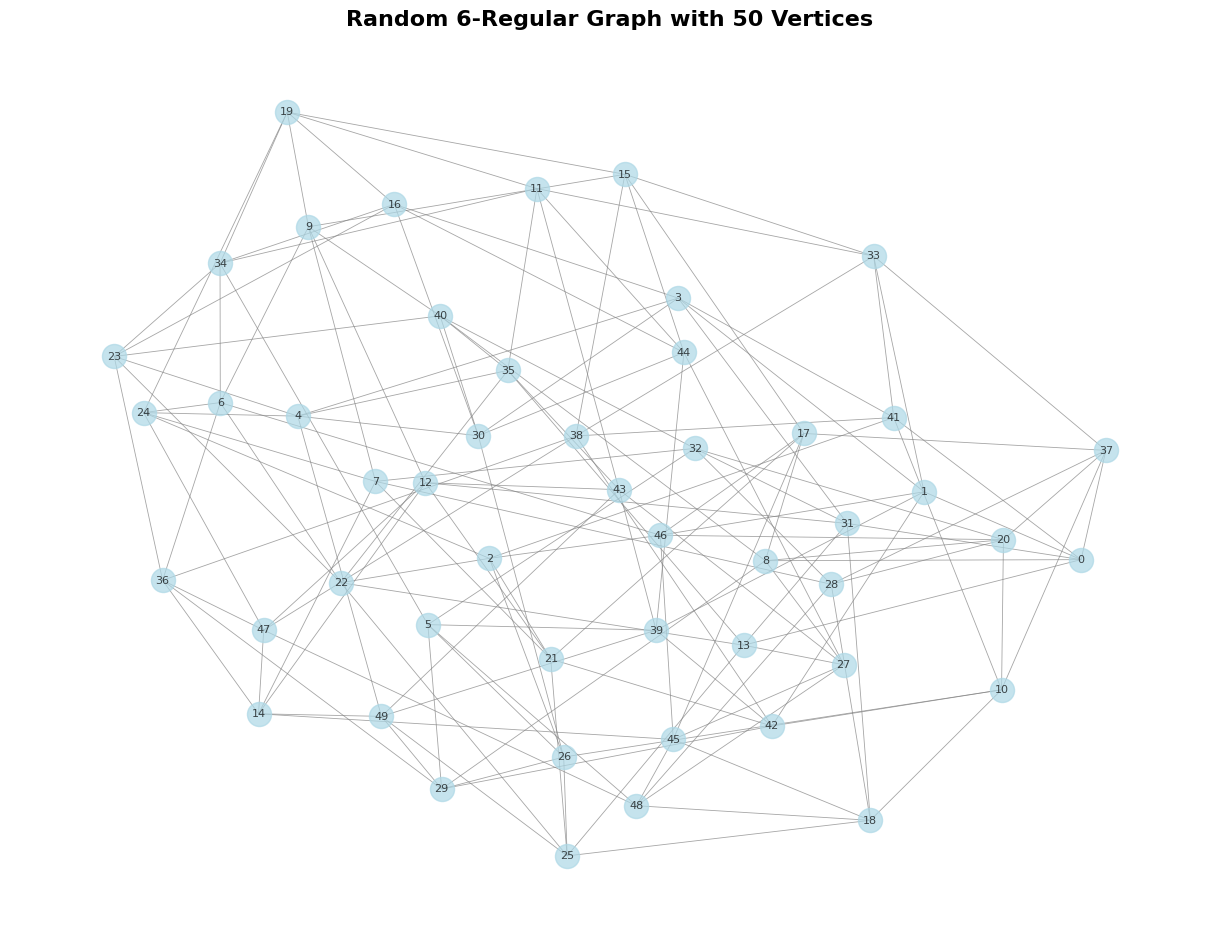

In [2]:
import networkx as nx
import random
import matplotlib.pyplot as plt

n = 50  # number of vertices
d = 6 # degree of each vertex

def generate_d_regular_graph(n, d):
    """
    Generate a random d-regular graph with n vertices and no self-cycles.
    
    Parameters:
    n (int): Number of vertices
    d (int): Degree of each vertex
    
    Returns:
    nx.Graph: A d-regular graph
    """
    if n * d % 2 != 0 or d >= n:
        raise ValueError("n * d must be even and d must be less than n")
    
    # Create an empty graph
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    # Create a list of available stubs (connection points)
    stubs = list(range(n)) * d
    
    while stubs:
        # Randomly select two different stubs
        u, v = random.sample(stubs, 2)
        
        # Ensure no self-loops and no multiple edges
        if u != v and not G.has_edge(u % n, v % n):
            G.add_edge(u % n, v % n)
            stubs.remove(u)
            stubs.remove(v)  

        import sys
        sys.stdout.write("\r" + " " * 20 + "\r")
        sys.stdout.write("\r" + f"Number of stubs remaining: {len(stubs)}")
        sys.stdout.flush()
    print()
    return G

graph = generate_d_regular_graph(n, d)
print(f"Generated a {d}-regular graph with {n} vertices")
print(f"Number of edges: {graph.number_of_edges()}")

# plot the graph

plt.figure(figsize=(12, 9))
pos = nx.spring_layout(graph, k=0.5, iterations=50)
nx.draw(graph, pos,
        node_color='lightblue',
        node_size=300,
        with_labels=True,
        font_size=8,
        edge_color='gray',
        width=0.6,
        alpha=0.7)
plt.title(f'Random {d}-Regular Graph with {n} Vertices', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()


We then calculate the Laplacian of $G$. 

$$
L = D - A
$$

Where D is the matrix such that 
$$
\begin{pmatrix}
\deg(1) & 0 & \cdots & 0 \\
0 & \deg(2) & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \deg(n)
\end{pmatrix}
$$

and $A$ is the adjacency matrix, where $A_{ij} = 1$ if there's an edge between vertices $i$ and $j$, and $0$ otherwise. $\deg(i)$ is the degree of vertex $i$, which is the number of edges connected to it. 

We then calculate the eigenvalues and eigenvectors of the Laplacian matrix. We can guarantee that $0$ is an eigenvalue, and you can verify this by plugging in the ones vector as the eigenvector. It is also the smallest eigenvalue, but this is harder to show.

We order the eigenvalues
$$
0 \leq \lambda_1 \leq \lambda_2 \leq \cdots \leq \lambda_n
$$

and we have corresponding eigenvectors $\varphi_1, \varphi_2, \cdots, \varphi_n$. 

We can then plot the eigenvectors $\varphi_j$, by coloring vertex $V_i$ with the value $\varphi_j(i)$ (the value of the $i$ index of the eigenvector). 

Qualitatively, we can see that for smaller $j$, then graph is colored "smoother", and for large $j$ the graph is more "spiky".

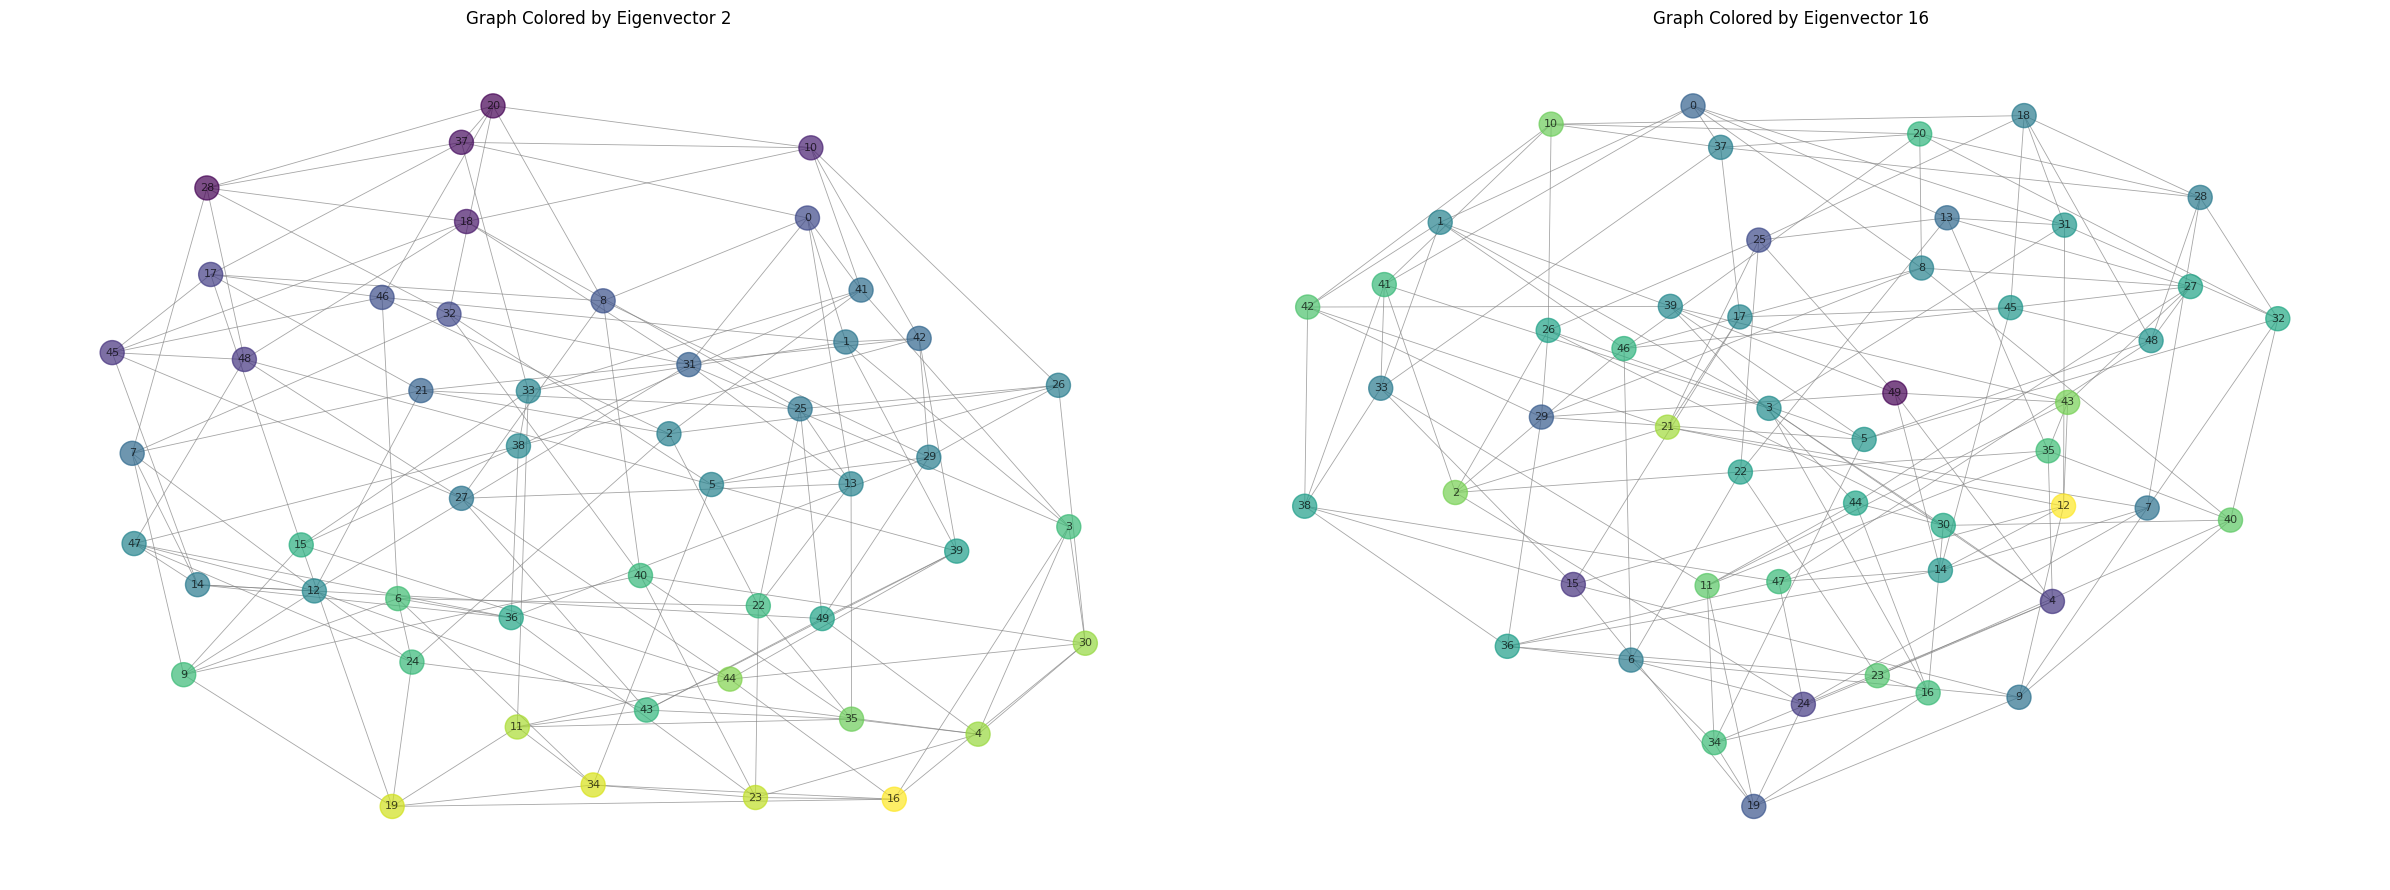

In [3]:
import numpy as np
import networkx as nx
import scipy.linalg as sla
import matplotlib.pyplot as plt

laplacian_matrix = nx.laplacian_matrix(graph).toarray()
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
eigenvectors = eigenvectors.T

vector_nums = [1, 15]
fig, axs = plt.subplots(1, 2, figsize=(24, 9))

for i, vector_num in enumerate(vector_nums):
    curr_vector = eigenvectors[vector_num]
    
    # plot the graph, and color the vertices by the values in the eigenvector
    nx.draw(graph, ax=axs[i], node_color=curr_vector, cmap='viridis', node_size=300, 
            with_labels=True, font_size=8, edge_color='gray', width=0.6, alpha=0.7)
    axs[i].set_title(f'Graph Colored by Eigenvector {vector_num + 1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

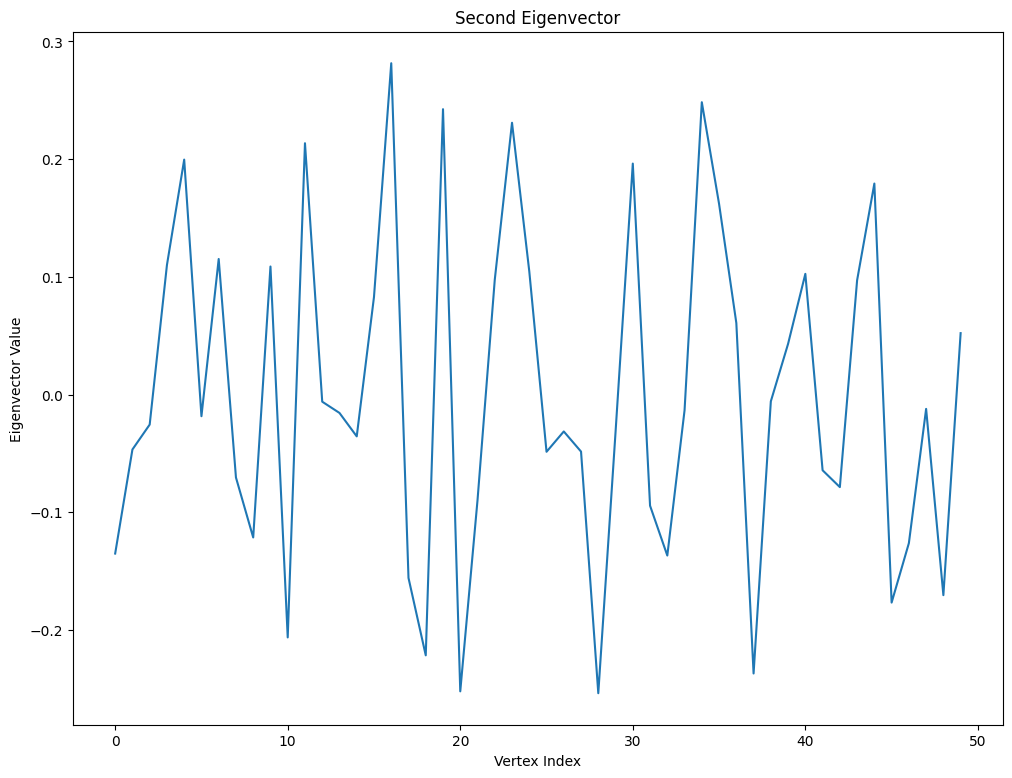

In [4]:
# plot the second eigenvector
plt.figure(figsize=(12, 9))
plt.plot(eigenvectors[1])
plt.title('Second Eigenvector')
plt.xlabel('Vertex Index')
plt.ylabel('Eigenvector Value')
plt.show()
